In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows',260)

In [2]:
# removing top column name using skiprows
df = pd.read_csv(r"C:\Users\Amit\Downloads\algerian fire dataset\Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1)

In [ ]:
df

In [ ]:
# some column names have extra spaces.
df.columns

In [3]:
# removing extra spaces from column names.
df.rename(columns={"Classes  ":"Classes"," RH":"RH"," Ws":"WS","Rain ":"Rain"}, inplace=True)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# here we see classes column has extra spaces in its values and also contain classes value, which is absurd.
for i in df.columns:
    print(i,'\n',df[i].unique())

In [4]:
# removing extra spaces from Classes column values.

df['Classes'] = df['Classes'].str.strip()

In [ ]:
for i in df.columns:
    print(i,'\n',df[i].unique())

In [ ]:
# removing classes value from Classes column.
df.describe()

In [ ]:
# here we see 243 values + 1 Classes value + 2 NA = 246 values
df["Classes"].value_counts()

In [5]:
# here we want to drop row index 122 and change Classes NaN value with mode of column
data = pd.isnull(df['Classes'])
df[data]

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
# removing 2 rows with missing data
df.drop(index=122, inplace=True)
df = df.drop([df.index[122]])

In [7]:
# finding nan value in column
data = pd.isnull(df['Classes'])
df[data]

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
# replacing nan value with mode.
df["Classes"].fillna(df['Classes'].mode()[0], inplace=True)

In [ ]:
df.describe()

In [ ]:
for i in df.columns:
    print(i,'\n',df[i].unique())

In [9]:
# since deleted 2 rows  , so  need  to reset index.
df.reset_index()

,index,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [ ]:
# now filling 'fire  ' value in FWI column with mean.
# for that we need to convert FWI column to float, then repalce by mean.

In [10]:
df["FWI"] = pd.to_numeric(df["FWI"],errors='coerce')

In [ ]:
df.dtypes

In [11]:
df["FWI"].fillna(8.5049, inplace=True)

In [ ]:
# final dataset

df

In [ ]:
df["FWI"] = pd.to_numeric(df["FWI"],errors='coerce')

In [12]:
df['DC'].replace('14.6 9','14.9',inplace=True)

In [13]:
df[['Temperature', 'RH', 'WS', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Temperature', 'RH', 'WS', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].apply(pd.to_numeric)

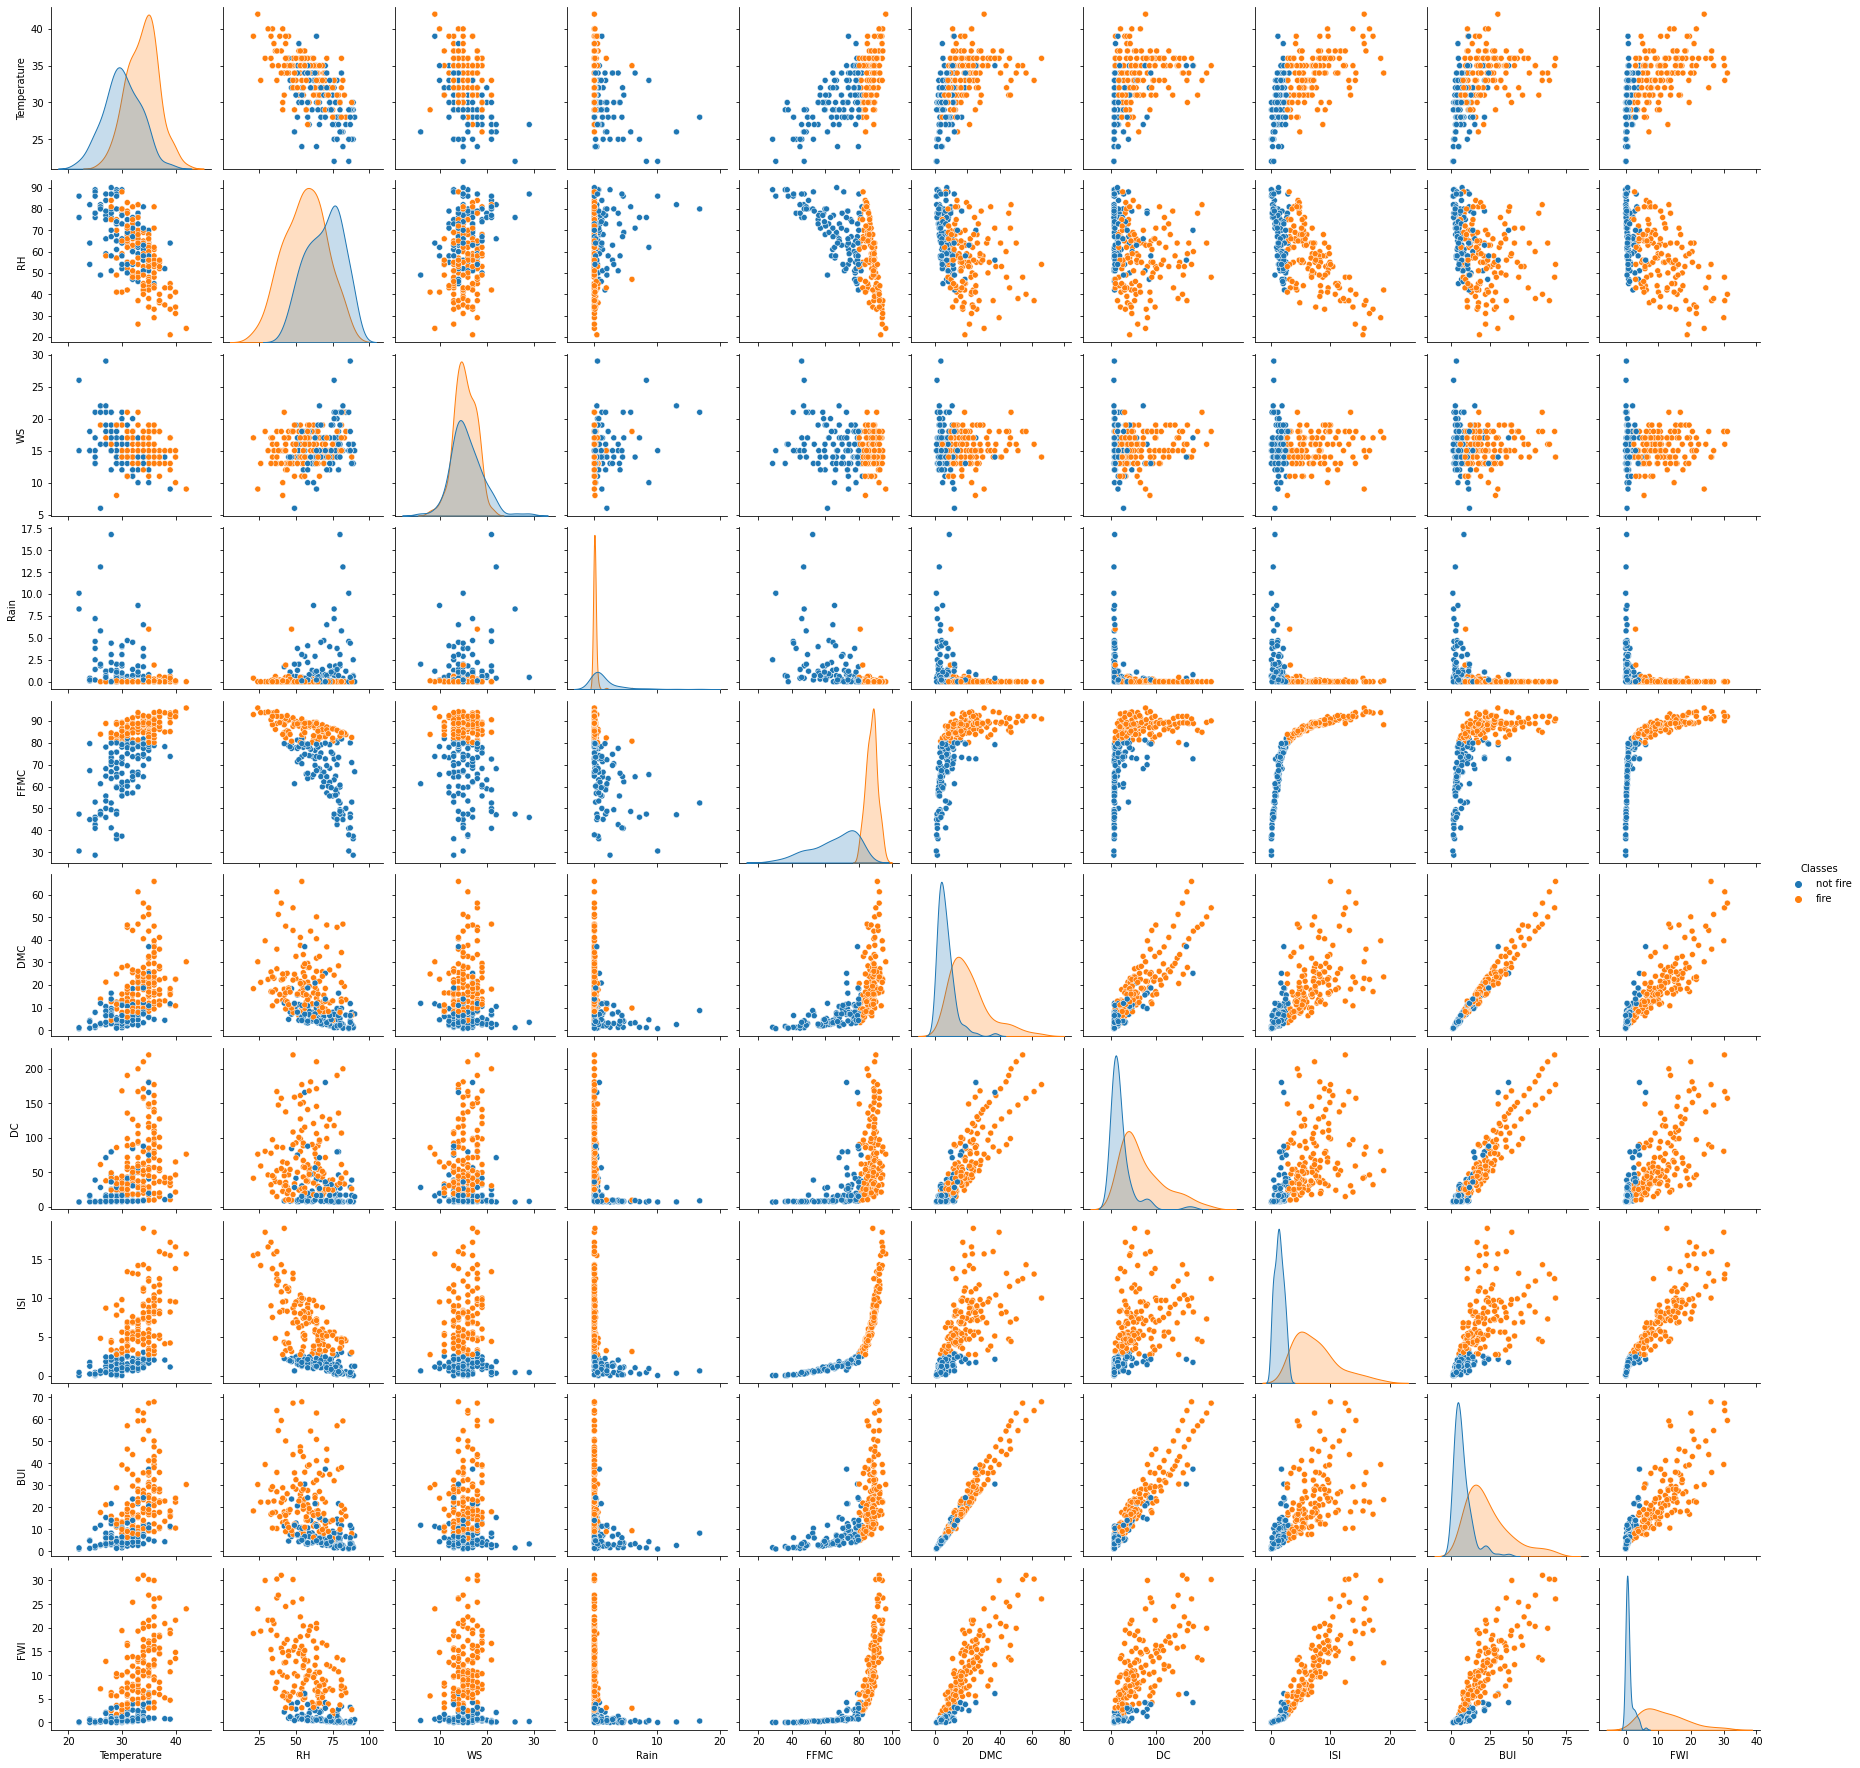

In [59]:
sns.pairplot(df,hue='Classes')

In [65]:
df.corr()

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370540,0.607551,0.455504,0.565636
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220378,-0.690637,-0.348587,-0.578895
WS,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076270,0.015248,0.029756,0.033036
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296817,-0.347105,-0.299171,-0.324571
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503939,0.739730,0.589652,0.690859
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875371,0.674499,0.982073,0.875640
DC,0.370540,-0.220378,0.076270,-0.296817,0.503939,0.875371,1.000000,0.498966,0.941911,0.738076
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498966,1.000000,0.635891,0.917777
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941911,0.635891,1.000000,0.857200
FWI,0.565636,-0.578895,0.033036,-0.324571,0.690859,0.875640,0.738076,0.917777,0.857200,1.000000


In [14]:
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### knn classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [17]:
acc = accuracy_score(y_test,knn_pred)

In [18]:
acc

0.918918918918919

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [20]:
rfc_acc = accuracy_score(y_test,rfc_pred)

In [21]:
rfc_acc

0.972972972972973

>1, train: 0.982, test: 0.973
>2, train: 0.988, test: 0.986
>3, train: 0.988, test: 0.973
>4, train: 1.000, test: 0.973
>5, train: 1.000, test: 0.986
>6, train: 1.000, test: 0.986
>7, train: 1.000, test: 0.986
>8, train: 1.000, test: 0.986
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 0.986
>11, train: 1.000, test: 0.986
>12, train: 1.000, test: 0.986
>13, train: 1.000, test: 0.986
>14, train: 1.000, test: 0.986
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 0.986
>18, train: 1.000, test: 0.986
>19, train: 1.000, test: 0.986
>20, train: 1.000, test: 0.986


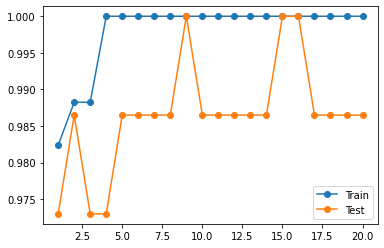

In [22]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

>1, train: 1.000, test: 0.932
>2, train: 0.959, test: 0.919
>3, train: 0.965, test: 0.932
>4, train: 0.935, test: 0.905
>5, train: 0.924, test: 0.919
>6, train: 0.918, test: 0.932
>7, train: 0.900, test: 0.919
>8, train: 0.906, test: 0.905
>9, train: 0.900, test: 0.905
>10, train: 0.900, test: 0.905
>11, train: 0.888, test: 0.919
>12, train: 0.900, test: 0.919
>13, train: 0.894, test: 0.919
>14, train: 0.894, test: 0.932
>15, train: 0.900, test: 0.919
>16, train: 0.894, test: 0.932
>17, train: 0.888, test: 0.932
>18, train: 0.882, test: 0.932
>19, train: 0.888, test: 0.932
>20, train: 0.882, test: 0.932


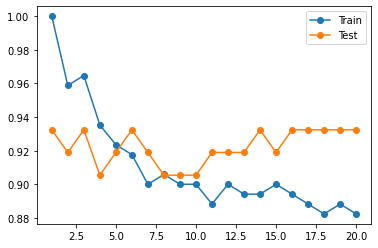

In [23]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

#### pickle file 

In [24]:
import pickle 

In [31]:
pickle.dump(rfc, open('model.pkl', 'wb'))

In [28]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

# batch input X_test

pickled_model.predict(X_test)

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire'], dtype=object)

In [40]:
## single  input 

dict = {
    'Temperature':42, 'RH':55, 'WS':18, 'Rain':3.8, 'FFMC':95.1, 'DMC':25, 'DC':82.6, 'ISI':8.24, 'BUI':28.3,
       'FWI':12.1
}

In [41]:
dict

{'Temperature': 42,
 'RH': 55,
 'WS': 18,
 'Rain': 3.8,
 'FFMC': 95.1,
 'DMC': 25,
 'DC': 82.6,
 'ISI': 8.24,
 'BUI': 28.3,
 'FWI': 12.1}

In [98]:
[list(dict.values())]

[[42, 55, 18, 3.8, 95.1, 25, 82.6, 8.24, 28.3, 12.1]]

In [102]:
# input values in form of a 2d array
pickled_model.predict([[42, 55, 18, 3.8, 95.1, 25, 82.6, 8.24, 28.3, 12.1]]
)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['fire'], dtype=object)

In [103]:
pickled_model.predict([[42, 55, 18, 3.8, 95.1, 25, 82.6, 8.24, 28.3, 12.1]])[0]

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'fire'

In [148]:
dict1 = {
    "Temperature": [42, 32, 35, 33, 32, 33, 33, 31, 34, 34],
    "RH": [55, 65, 53, 48, 76, 73, 79, 64, 45, 55],
    "WS": [18, 18, 19, 13, 15, 15, 15, 17, 14, 12],
    "Rain": [3.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.3, 0.0],
    "FFMC": [95.1, 86.5, 77.1, 87.4, 88.9, 88.9, 81.3, 87.0, 87.0, 82.4],
    "DMC": [25, 21.7, 15.6, 11.7, 16.0, 20.0, 23.2, 25.9, 29.6, 33.5],
    "DC": [82.6, 85.1, 94.7, 92.5, 90.4, 100.7, 110.9, 120.9, 130.6, 141.1],
    "ISI": [8.24, 3.7, 2.8, 9.7, 9.7, 9.7, 8.8, 9.2, 9.9, 10.4],
    "BUI": [28.3, 24.4, 27.2, 22.0, 17.6, 22.9, 27.5, 31.3, 34.7, 38.8],
    "FWI": [12.1, 16.1, 17.2, 16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7]
}

In [149]:
dict1.values()

dict_values([[42, 32, 35, 33, 32, 33, 33, 31, 34, 34], [55, 65, 53, 48, 76, 73, 79, 64, 45, 55], [18, 18, 19, 13, 15, 15, 15, 17, 14, 12], [3.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.3, 0.0], [95.1, 86.5, 77.1, 87.4, 88.9, 88.9, 81.3, 87.0, 87.0, 82.4], [25, 21.7, 15.6, 11.7, 16.0, 20.0, 23.2, 25.9, 29.6, 33.5], [82.6, 85.1, 94.7, 92.5, 90.4, 100.7, 110.9, 120.9, 130.6, 141.1], [8.24, 3.7, 2.8, 9.7, 9.7, 9.7, 8.8, 9.2, 9.9, 10.4], [28.3, 24.4, 27.2, 22.0, 17.6, 22.9, 27.5, 31.3, 34.7, 38.8], [12.1, 16.1, 17.2, 16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7]])

In [150]:
pickled_model.predict(list(dict1.values()))

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['not fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'not fire', 'not fire', 'fire'], dtype=object)

In [151]:
np.array(dict1.values()).tolist()

dict_values([[42, 32, 35, 33, 32, 33, 33, 31, 34, 34], [55, 65, 53, 48, 76, 73, 79, 64, 45, 55], [18, 18, 19, 13, 15, 15, 15, 17, 14, 12], [3.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.3, 0.0], [95.1, 86.5, 77.1, 87.4, 88.9, 88.9, 81.3, 87.0, 87.0, 82.4], [25, 21.7, 15.6, 11.7, 16.0, 20.0, 23.2, 25.9, 29.6, 33.5], [82.6, 85.1, 94.7, 92.5, 90.4, 100.7, 110.9, 120.9, 130.6, 141.1], [8.24, 3.7, 2.8, 9.7, 9.7, 9.7, 8.8, 9.2, 9.9, 10.4], [28.3, 24.4, 27.2, 22.0, 17.6, 22.9, 27.5, 31.3, 34.7, 38.8], [12.1, 16.1, 17.2, 16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7]])